<a href="https://colab.research.google.com/github/alamali88/Alam-Ali_ML_Project_Fall-2020/blob/main/Keras_Regression_ACOPF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LeakyReLU
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from keras.constraints import max_norm

# load dataset

system = "14"

dataframeX = read_csv("/content/drive/MyDrive/14result_overall_in.csv", delimiter=',', header=None)
X = dataframeX.values[0:]
dataframeY = read_csv("/content/drive/MyDrive/14result_overall_out.csv", delimiter=',', header=None)
Y = dataframeY.values


# split into input (X) and output (Y) variables
print (len(X))
print (X.shape)

print (len(Y))
print (Y.shape)
nsamples = X.shape[0]
npredictors = X.shape[1]
noutvars = Y.shape[1]
print (npredictors)
print (noutvars)

70677
(70677, 60)
70677
(70677, 38)
60
38


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
model = Sequential() # do this every time to reset the model!
model.add(Dense(npredictors, input_dim=npredictors, kernel_initializer='normal', activation='tanh'))
model.add(Dense(10000, activation='relu'))
model.add(Dense(noutvars, activation='linear'))#,kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))

model.summary()
opt = tf.keras.optimizers.Adam(learning_rate=0.00007)
model.compile(loss='mse', optimizer=opt, metrics=['mse','mae'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_4 (Dense)              (None, 10000)             610000    
_________________________________________________________________
dense_5 (Dense)              (None, 38)                380038    
Total params: 993,698
Trainable params: 993,698
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X, Y, epochs=5, batch_size=64,  verbose=1, validation_split=0.2)

Epoch 1/5
884/884 [==============================] - 15s 17ms/step - loss: 0.0965 - mse: 0.0965 - mae: 0.1489 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0340
Epoch 2/5
884/884 [==============================] - 15s 17ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0325 - val_loss: 0.0026 - val_mse: 0.0026 - val_mae: 0.0289
Epoch 3/5
884/884 [==============================] - 15s 17ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0280 - val_loss: 0.0024 - val_mse: 0.0024 - val_mae: 0.0258
Epoch 4/5
884/884 [==============================] - 15s 17ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0255 - val_loss: 0.0021 - val_mse: 0.0021 - val_mae: 0.0252
Epoch 5/5
884/884 [==============================] - 15s 17ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0207 - val_loss: 9.2395e-04 - val_mse: 9.2395e-04 - val_mae: 0.0152


In [28]:
model.save(system+'busNN.h5')

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


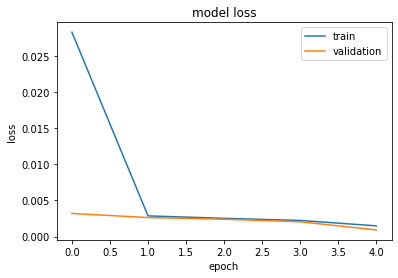

In [29]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()